In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
trainA = pd.read_csv("region_A_train.csv", index_col="date")
trainB = pd.read_csv("region_B_train.csv", index_col="date")
trainC = pd.read_csv("region_C_train.csv", index_col="date")
trainD = pd.read_csv("region_D_train.csv", index_col="date")
trainE = pd.read_csv("region_E_train.csv", index_col="date")

train = pd.concat([trainA, trainB, trainC, trainD, trainE], axis=1)

testA = pd.read_csv("region_A_test.csv", index_col="date")
testB = pd.read_csv("region_B_test.csv", index_col="date")
testC = pd.read_csv("region_C_test.csv", index_col="date")
testD = pd.read_csv("region_D_test.csv", index_col="date")
testE = pd.read_csv("region_E_test.csv", index_col="date")

test = pd.concat([testA, testB, testC, testD, testE], axis=1)

solution_train = pd.read_csv("solution_train.csv", index_col="date")

In [3]:
train = train.drop(['max.wind.speed.dir', 'max.inst.wind.speed.dir', 'min.atmos.pressure'], axis=1)
test = test.drop(['max.wind.speed.dir', 'max.inst.wind.speed.dir', 'min.atmos.pressure'], axis=1)

In [4]:
train

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,...,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed
date,,,,,,,,,,,,,,,,,,,,,
229b70a3,3.3,10.2,-2.4,0.0,2.9,9.3,14.3,2.6,9.3,-3.3,...,1.5,5.4,9.4,-0.6,5.2,-5.9,0.0,1.5,3.8,9.8
3134f4ff,5.7,13.7,-2.9,0.0,3.6,10.7,15.8,5.1,14.6,-4.6,...,1.5,4.5,8.2,1.3,9.6,-6.1,0.0,1.5,5.4,11.6
dbfaf910,13.8,20.0,9.0,0.0,5.3,9.4,15.2,12.3,19.0,5.2,...,1.5,4.8,9.2,8.6,15.4,2.2,0.0,1.9,4.2,10.7
3aea0cf0,11.4,19.3,5.8,0.0,4.2,10.1,20.6,11.0,20.1,6.5,...,2.6,7.7,16.7,7.6,15.6,2.4,3.0,1.9,5.6,14.2
f0227f56,2.4,7.7,0.3,43.5,0.9,3.7,5.7,2.1,5.9,0.2,...,0.4,2.0,3.0,0.9,3.4,0.0,41.5,0.2,1.3,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91b2797d,9.5,16.1,3.6,0.0,1.5,3.9,6.2,9.3,16.9,2.5,...,1.0,2.8,4.9,6.3,13.1,0.3,0.0,0.6,2.2,4.3
b807fd87,10.9,17.4,5.3,0.0,2.0,5.5,9.9,9.3,15.2,3.7,...,1.1,5.4,8.6,6.2,13.5,0.3,0.0,0.8,2.3,6.3
8e0a48e0,12.7,20.0,8.2,0.0,1.7,5.2,8.2,11.6,19.5,5.8,...,1.0,3.2,5.8,9.0,15.9,2.4,0.0,0.6,2.4,5.7


In [5]:
test

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,...,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed
date,,,,,,,,,,,,,,,,,,,,,
b92d713a,5.0,11.9,0.7,0.0,3.6,11.9,16.7,3.9,10.1,-0.9,...,1.4,4.9,8.4,0.9,6.7,-2.8,1.0,1.3,3.0,7.3
18817005,2.9,9.1,-1.8,0.0,3.4,9.6,15.4,2.3,8.0,-2.6,...,1.4,5.4,12.5,-0.5,4.4,-4.8,0.0,1.7,4.4,10.5
8e19dc3c,9.8,18.9,0.4,0.0,3.1,8.9,13.6,9.3,19.0,-2.3,...,1.6,5.1,9.8,6.0,14.6,-2.7,0.0,1.3,3.7,8.3
6f0929dc,13.4,21.2,6.1,0.0,3.4,8.8,13.8,12.0,20.7,4.0,...,1.3,4.7,8.2,8.9,17.4,0.9,0.0,1.4,4.8,11.5
c7506622,9.1,16.3,2.4,0.0,2.7,7.6,11.9,7.6,14.6,1.5,...,1.7,4.8,9.2,4.9,11.0,-0.1,0.0,1.4,3.6,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01a1b150,9.3,11.6,7.5,0.0,0.9,3.3,4.8,9.2,13.7,5.6,...,0.8,2.9,5.3,6.9,9.5,4.3,1.5,0.3,1.2,2.7
90b49549,9.6,18.6,2.9,0.0,1.5,6.8,8.4,8.8,18.3,1.1,...,1.0,3.5,5.2,6.5,15.8,-0.1,0.0,0.6,2.2,4.7
15bc4979,9.7,11.5,8.2,9.0,1.1,4.3,6.6,9.5,12.9,6.2,...,0.8,2.2,4.1,7.9,10.3,3.5,9.5,0.3,1.7,5.8


In [6]:
core_train = train[['avg.temp', 'max.temp', 'min.temp', 'precipitation']].copy()
core_test = test[['avg.temp', 'max.temp', 'min.temp', 'precipitation']].copy()

In [7]:
core_train

,avg.temp,avg.temp,avg.temp,avg.temp,avg.temp,max.temp,max.temp,max.temp,max.temp,max.temp,min.temp,min.temp,min.temp,min.temp,min.temp,precipitation,precipitation,precipitation,precipitation,precipitation
date,,,,,,,,,,,,,,,,,,,,
229b70a3,3.3,2.6,1.4,3.7,-0.6,10.2,9.3,9.0,11.7,5.2,-2.4,-3.3,-4.3,-2.6,-5.9,0.0,0.0,0.0,0.0,0.0
3134f4ff,5.7,5.1,4.0,6.6,1.3,13.7,14.6,13.1,15.9,9.6,-2.9,-4.6,-3.2,-1.6,-6.1,0.0,0.0,0.0,0.0,0.0
dbfaf910,13.8,12.3,10.7,12.9,8.6,20.0,19.0,18.9,21.8,15.4,9.0,5.2,4.7,6.2,2.2,0.0,0.0,0.0,0.0,0.0
3aea0cf0,11.4,11.0,9.0,12.2,7.6,19.3,20.1,17.6,20.0,15.6,5.8,6.5,1.3,5.6,2.4,0.0,0.0,0.5,5.0,3.0
f0227f56,2.4,2.1,3.5,2.6,0.9,7.7,5.9,6.3,7.6,3.4,0.3,0.2,0.5,0.2,0.0,43.5,42.5,28.5,36.5,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91b2797d,9.5,9.3,7.9,9.7,6.3,16.1,16.9,15.2,16.8,13.1,3.6,2.5,2.8,4.1,0.3,0.0,0.0,0.0,0.0,0.0
b807fd87,10.9,9.3,8.3,10.7,6.2,17.4,15.2,16.1,19.0,13.5,5.3,3.7,3.5,5.7,0.3,0.0,0.0,0.0,0.0,0.0
8e0a48e0,12.7,11.6,11.0,13.7,9.0,20.0,19.5,18.0,21.0,15.9,8.2,5.8,6.6,9.5,2.4,0.0,0.0,0.0,0.0,0.0


In [8]:
core_test

,avg.temp,avg.temp,avg.temp,avg.temp,avg.temp,max.temp,max.temp,max.temp,max.temp,max.temp,min.temp,min.temp,min.temp,min.temp,min.temp,precipitation,precipitation,precipitation,precipitation,precipitation
date,,,,,,,,,,,,,,,,,,,,
b92d713a,5.0,3.9,2.9,5.0,0.9,11.9,10.1,9.9,13.3,6.7,0.7,-0.9,0.1,0.4,-2.8,0.0,0.0,3.0,0.5,1.0
18817005,2.9,2.3,1.3,3.5,-0.5,9.1,8.0,7.5,9.9,4.4,-1.8,-2.6,-3.3,-1.1,-4.8,0.0,0.0,0.0,0.0,0.0
8e19dc3c,9.8,9.3,7.7,9.8,6.0,18.9,19.0,17.2,19.7,14.6,0.4,-2.3,-0.5,0.5,-2.7,0.0,0.0,0.0,0.0,0.0
6f0929dc,13.4,12.0,11.5,13.3,8.9,21.2,20.7,19.9,22.5,17.4,6.1,4.0,4.9,4.3,0.9,0.0,0.0,0.0,0.0,0.0
c7506622,9.1,7.6,6.6,9.3,4.9,16.3,14.6,15.0,17.2,11.0,2.4,1.5,-1.2,1.5,-0.1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01a1b150,9.3,9.2,8.8,10.2,6.9,11.6,13.7,12.4,13.5,9.5,7.5,5.6,5.9,8.7,4.3,0.0,0.5,0.5,2.0,1.5
90b49549,9.6,8.8,8.4,10.1,6.5,18.6,18.3,18.2,17.5,15.8,2.9,1.1,3.2,4.9,-0.1,0.0,0.0,0.0,0.0,0.0
15bc4979,9.7,9.5,9.4,10.4,7.9,11.5,12.9,11.8,12.1,10.3,8.2,6.2,7.1,7.7,3.5,9.0,6.0,10.5,7.0,9.5


In [9]:
core_train.apply(pd.isnull).sum()/core_test.shape[0]

avg.temp         0.0
avg.temp         0.0
avg.temp         0.0
avg.temp         0.0
avg.temp         0.0
max.temp         0.0
max.temp         0.0
max.temp         0.0
max.temp         0.0
max.temp         0.0
min.temp         0.0
min.temp         0.0
min.temp         0.0
min.temp         0.0
min.temp         0.0
precipitation    0.0
precipitation    0.0
precipitation    0.0
precipitation    0.0
precipitation    0.0
dtype: float64

<Axes: xlabel='date'>

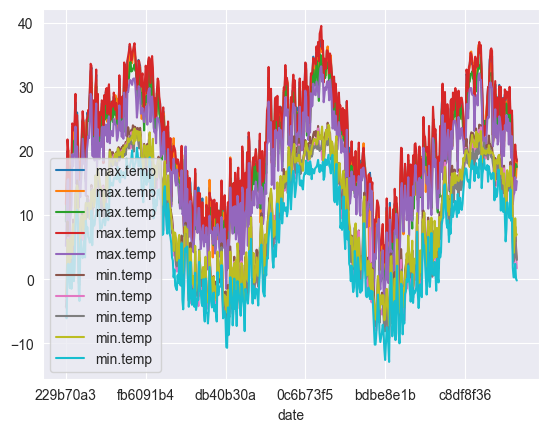

In [10]:
core_train[['max.temp', 'min.temp']].plot()

In [11]:
le = LabelEncoder()
solution_train['label'] = le.fit_transform(solution_train['label'])

In [12]:
X_train = train
y_train = solution_train['label']
X_test = test

In [13]:
model = RandomForestClassifier()

In [14]:
train

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,...,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed
date,,,,,,,,,,,,,,,,,,,,,
229b70a3,3.3,10.2,-2.4,0.0,2.9,9.3,14.3,2.6,9.3,-3.3,...,1.5,5.4,9.4,-0.6,5.2,-5.9,0.0,1.5,3.8,9.8
3134f4ff,5.7,13.7,-2.9,0.0,3.6,10.7,15.8,5.1,14.6,-4.6,...,1.5,4.5,8.2,1.3,9.6,-6.1,0.0,1.5,5.4,11.6
dbfaf910,13.8,20.0,9.0,0.0,5.3,9.4,15.2,12.3,19.0,5.2,...,1.5,4.8,9.2,8.6,15.4,2.2,0.0,1.9,4.2,10.7
3aea0cf0,11.4,19.3,5.8,0.0,4.2,10.1,20.6,11.0,20.1,6.5,...,2.6,7.7,16.7,7.6,15.6,2.4,3.0,1.9,5.6,14.2
f0227f56,2.4,7.7,0.3,43.5,0.9,3.7,5.7,2.1,5.9,0.2,...,0.4,2.0,3.0,0.9,3.4,0.0,41.5,0.2,1.3,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91b2797d,9.5,16.1,3.6,0.0,1.5,3.9,6.2,9.3,16.9,2.5,...,1.0,2.8,4.9,6.3,13.1,0.3,0.0,0.6,2.2,4.3
b807fd87,10.9,17.4,5.3,0.0,2.0,5.5,9.9,9.3,15.2,3.7,...,1.1,5.4,8.6,6.2,13.5,0.3,0.0,0.8,2.3,6.3
8e0a48e0,12.7,20.0,8.2,0.0,1.7,5.2,8.2,11.6,19.5,5.8,...,1.0,3.2,5.8,9.0,15.9,2.4,0.0,0.6,2.4,5.7


In [15]:
test

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,...,avg.wind.speed,max.wind.speed,max.inst.wind.speed,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed
date,,,,,,,,,,,,,,,,,,,,,
b92d713a,5.0,11.9,0.7,0.0,3.6,11.9,16.7,3.9,10.1,-0.9,...,1.4,4.9,8.4,0.9,6.7,-2.8,1.0,1.3,3.0,7.3
18817005,2.9,9.1,-1.8,0.0,3.4,9.6,15.4,2.3,8.0,-2.6,...,1.4,5.4,12.5,-0.5,4.4,-4.8,0.0,1.7,4.4,10.5
8e19dc3c,9.8,18.9,0.4,0.0,3.1,8.9,13.6,9.3,19.0,-2.3,...,1.6,5.1,9.8,6.0,14.6,-2.7,0.0,1.3,3.7,8.3
6f0929dc,13.4,21.2,6.1,0.0,3.4,8.8,13.8,12.0,20.7,4.0,...,1.3,4.7,8.2,8.9,17.4,0.9,0.0,1.4,4.8,11.5
c7506622,9.1,16.3,2.4,0.0,2.7,7.6,11.9,7.6,14.6,1.5,...,1.7,4.8,9.2,4.9,11.0,-0.1,0.0,1.4,3.6,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01a1b150,9.3,11.6,7.5,0.0,0.9,3.3,4.8,9.2,13.7,5.6,...,0.8,2.9,5.3,6.9,9.5,4.3,1.5,0.3,1.2,2.7
90b49549,9.6,18.6,2.9,0.0,1.5,6.8,8.4,8.8,18.3,1.1,...,1.0,3.5,5.2,6.5,15.8,-0.1,0.0,0.6,2.2,4.7
15bc4979,9.7,11.5,8.2,9.0,1.1,4.3,6.6,9.5,12.9,6.2,...,0.8,2.2,4.1,7.9,10.3,3.5,9.5,0.3,1.7,5.8


In [16]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = model.predict(X_test)

In [18]:
final_file = pd.read_csv("solution_format.csv")

In [19]:
solution_format = pd.DataFrame({'label': le.inverse_transform(y_pred)})

In [22]:
solution_format

,label
0,N
1,N
2,N
3,N
4,N
...,...
373,L
374,N
375,N
376,N


In [23]:
solution_format.index = final_file['date']
solution_format.to_csv('solution_format.csv', index_label='date', header=['label'], quoting=1)

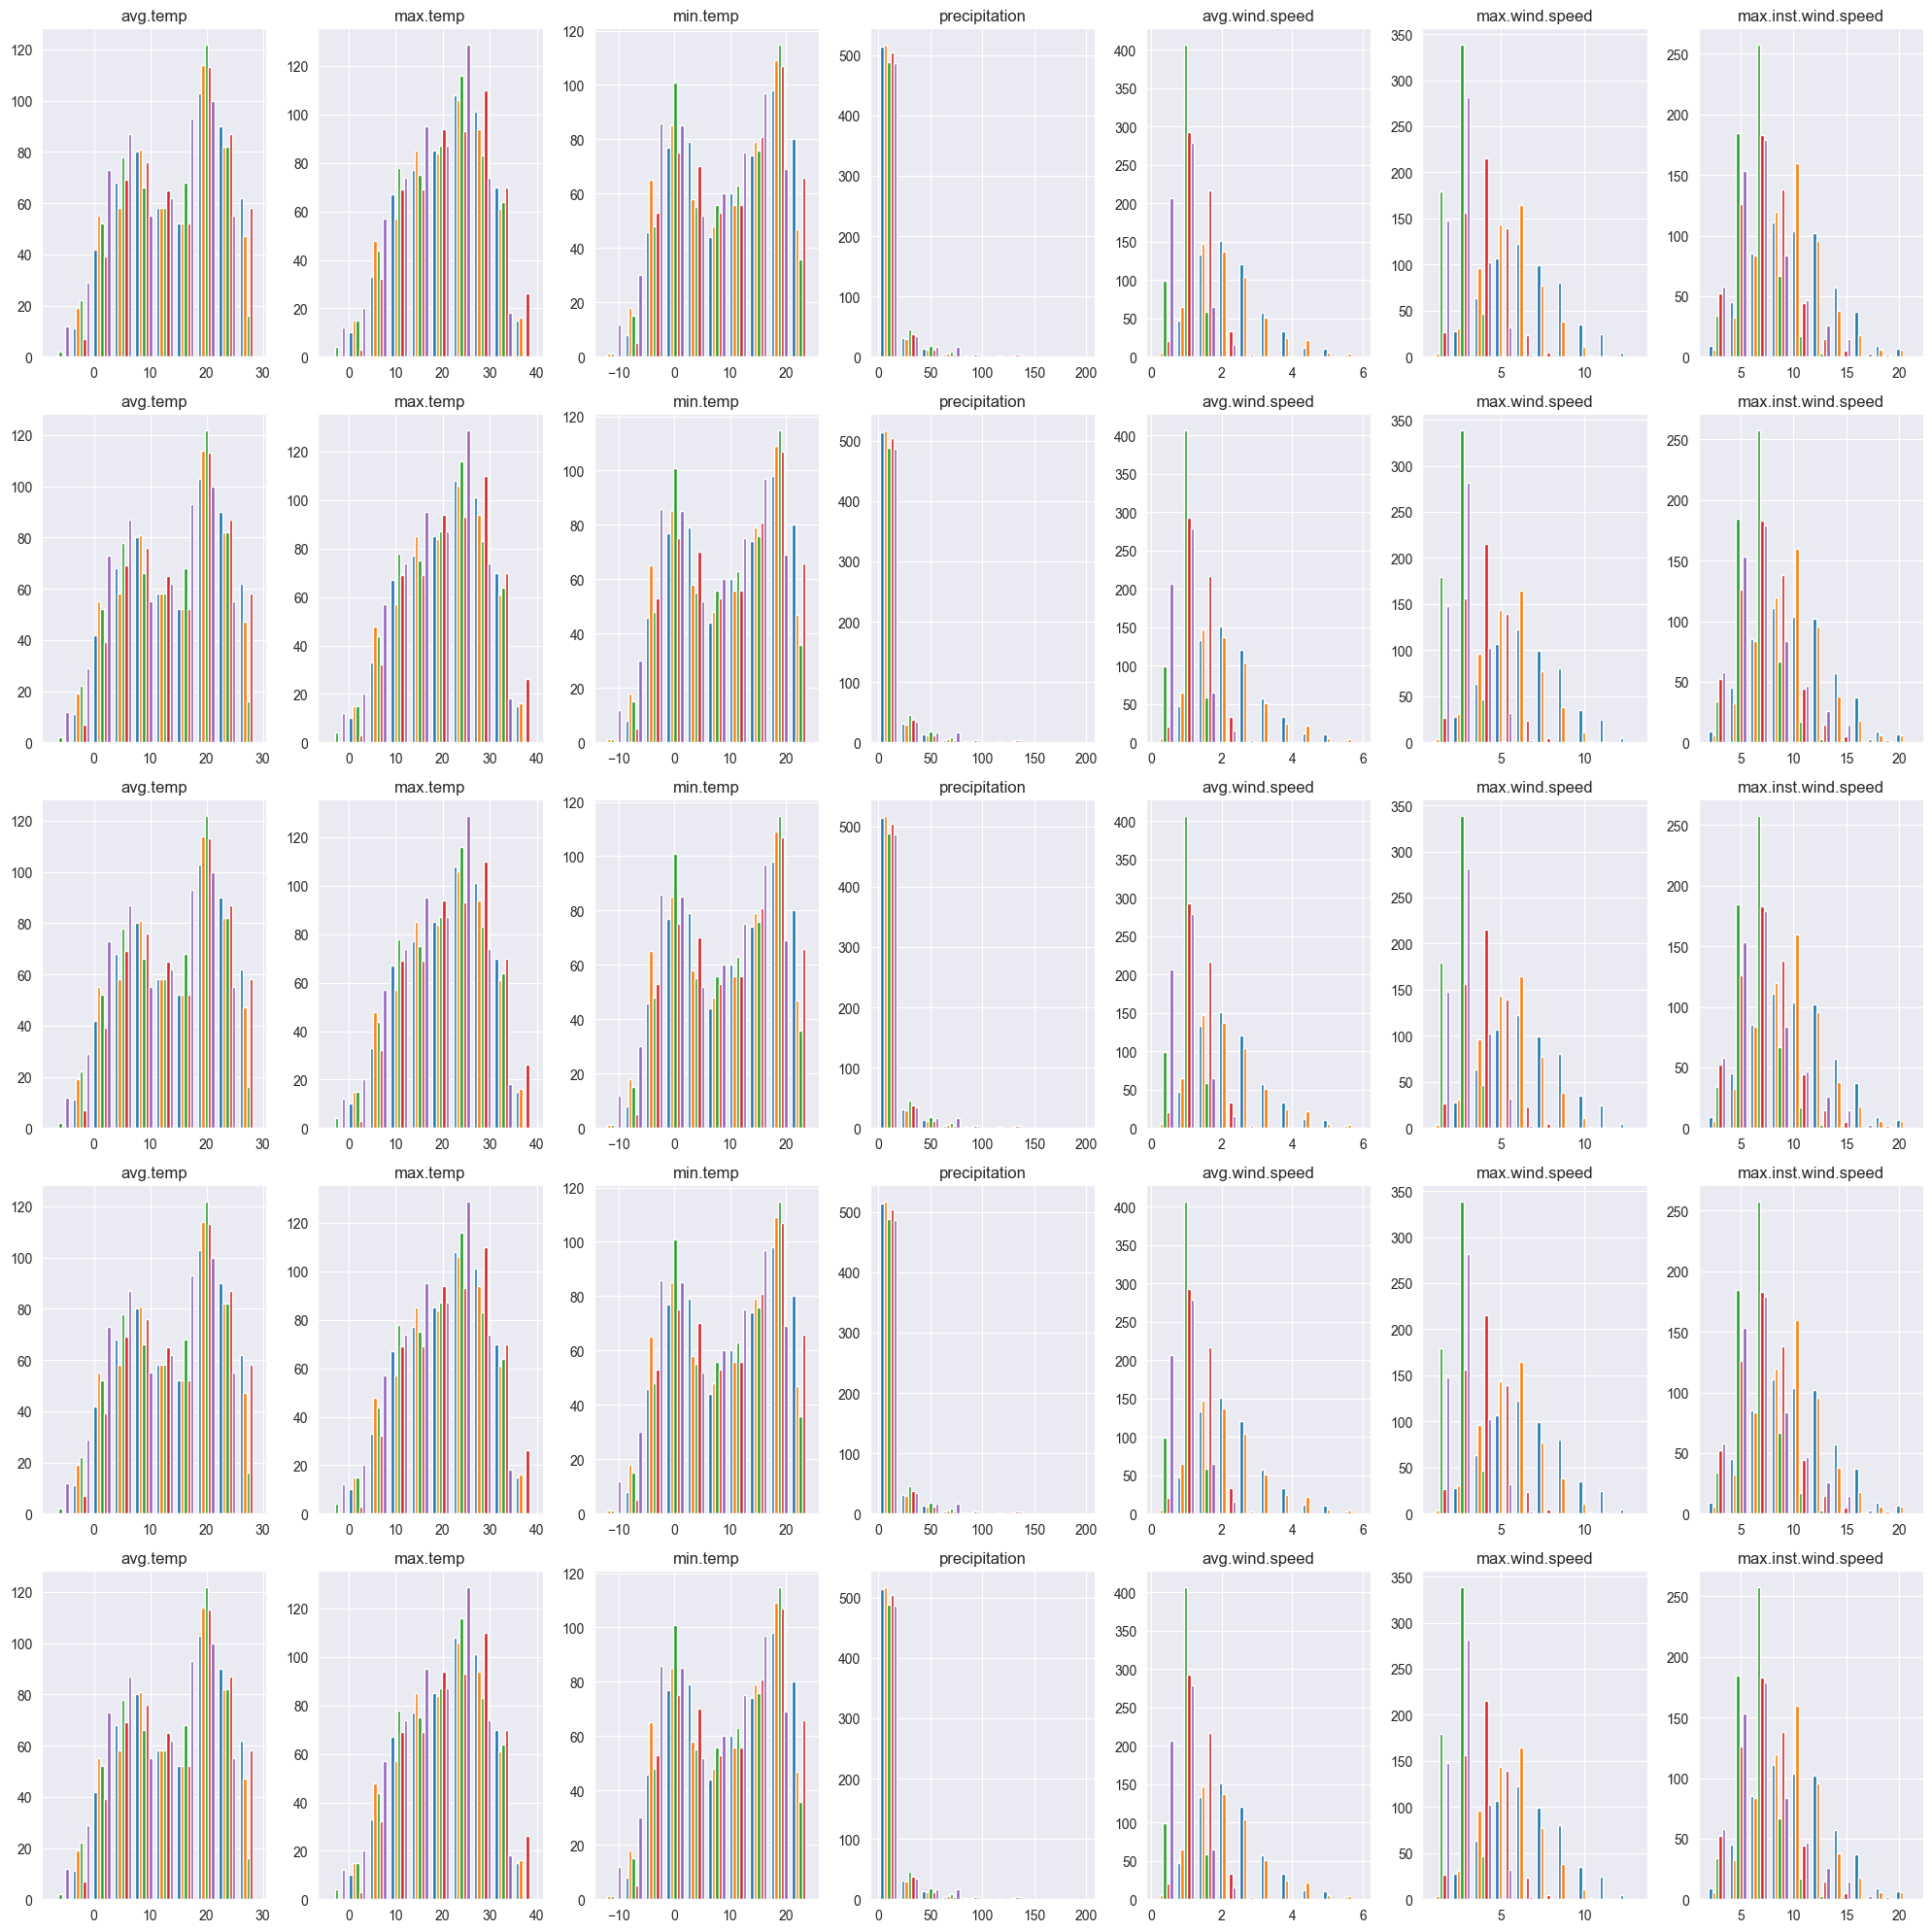

In [24]:
train.hist(figsize=(20, 20), layout=(5, 7))
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()